In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.optimize import curve_fit

In [3]:
df = pd.read_excel('EV_cars.xlsx')

In [4]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [5]:
df.shape

(177866, 17)

In [6]:
df = df.dropna()

In [7]:
df[['Model Year', 'Electric Range', 'Postal Code']] = df[['Model Year', 'Electric Range', 'Postal Code']].astype(int)

In [8]:
df['State'].value_counts()

State
WA    177078
Name: count, dtype: int64

In [9]:
model = df['Make'].value_counts().sort_values(ascending=False)

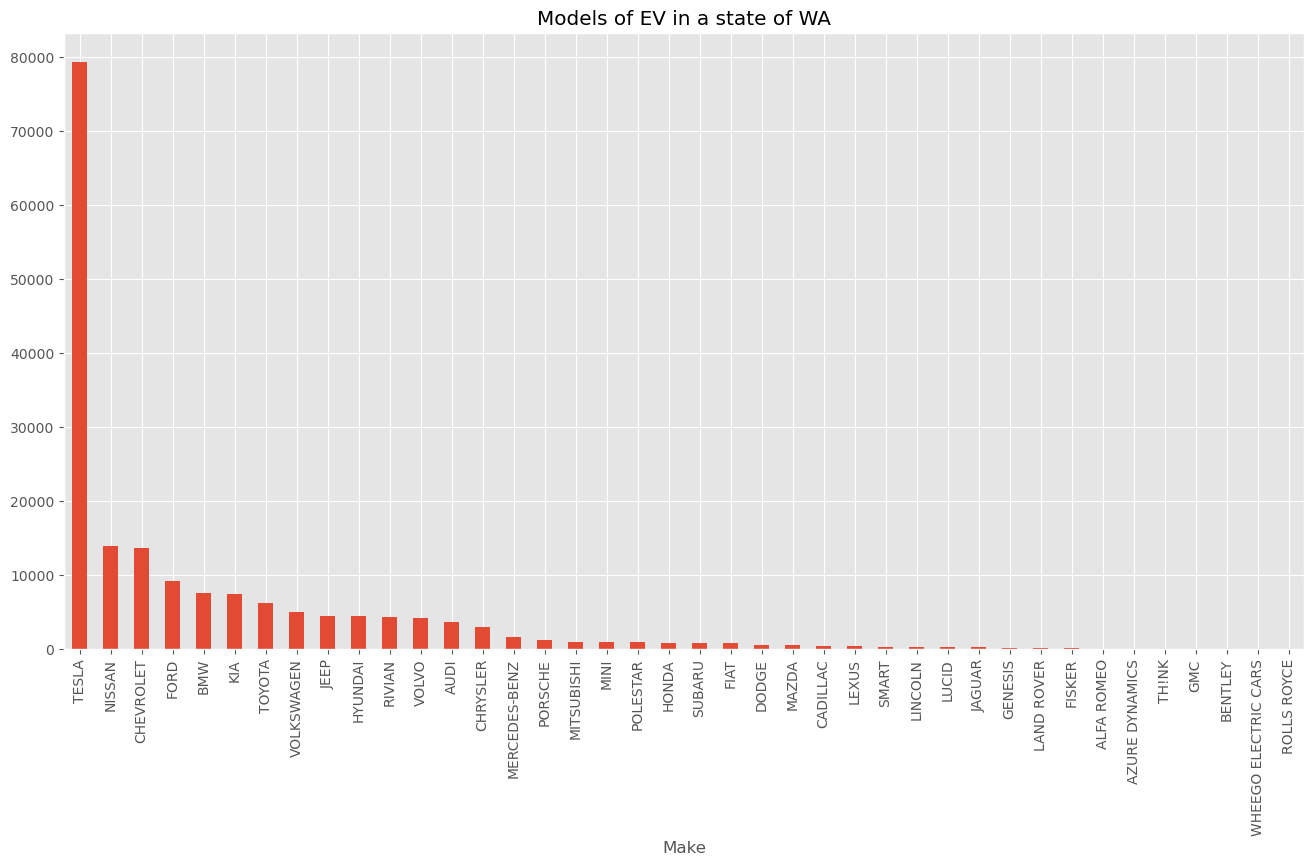

In [11]:
model.plot(kind='bar', title='Models of EV in a state of WA', figsize=(16,8))
plt.show()

In [12]:
model

Make
TESLA                   79326
NISSAN                  13967
CHEVROLET               13597
FORD                     9131
BMW                      7550
KIA                      7412
TOYOTA                   6230
VOLKSWAGEN               4979
JEEP                     4458
HYUNDAI                  4393
RIVIAN                   4291
VOLVO                    4113
AUDI                     3628
CHRYSLER                 2967
MERCEDES-BENZ            1587
PORSCHE                  1136
MITSUBISHI                953
MINI                      896
POLESTAR                  879
HONDA                     829
SUBARU                    828
FIAT                      784
DODGE                     568
MAZDA                     475
CADILLAC                  378
LEXUS                     370
SMART                     270
LINCOLN                   265
LUCID                     240
JAGUAR                    232
GENESIS                   181
LAND ROVER                 55
FISKER                     48
ALFA 

In [13]:
registration = df['Model Year'].value_counts().sort_index()

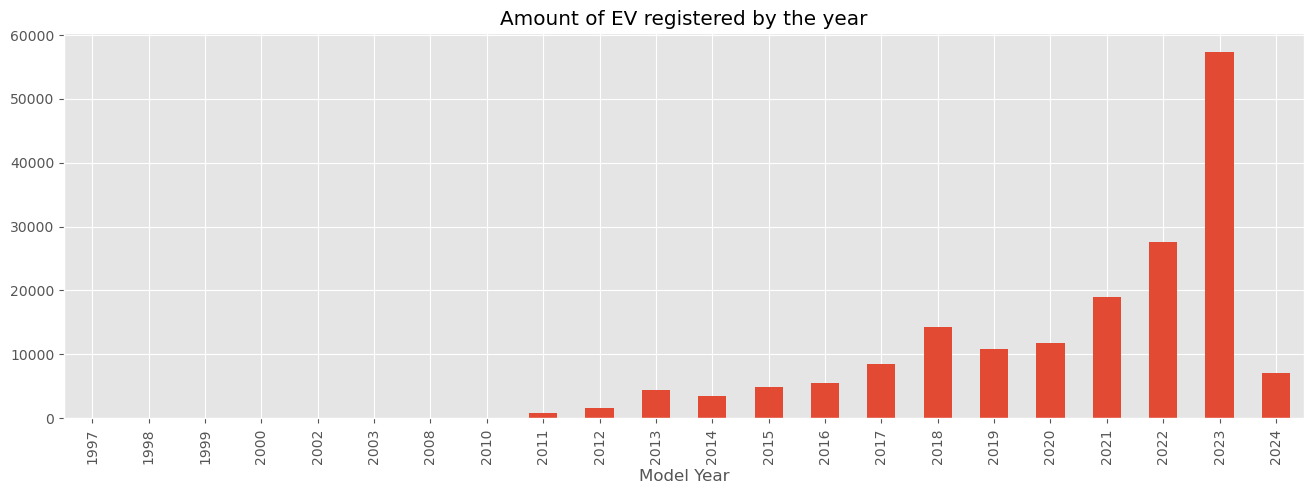

In [14]:
registration.plot(kind='bar', title='Amount of EV registered by the year', figsize=(16,5))
plt.show()

# The noticeable expansion of the market begins in 2014

In [16]:
registration

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      772
2012     1610
2013     4392
2014     3488
2015     4816
2016     5460
2017     8505
2018    14252
2019    10888
2020    11709
2021    19025
2022    27635
2023    57407
2024     7060
Name: count, dtype: int64

In [17]:
model_registration_counts = df.groupby(['Make', 'Model Year']).size().reset_index(name='counts')

In [18]:
model_registration_counts

,Make,Model Year,counts
0,ALFA ROMEO,2024,39
1,AUDI,2016,200
2,AUDI,2017,180
3,AUDI,2018,166
4,AUDI,2019,524
...,...,...,...
247,VOLVO,2021,702
248,VOLVO,2022,990
249,VOLVO,2023,1222
250,VOLVO,2024,346


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


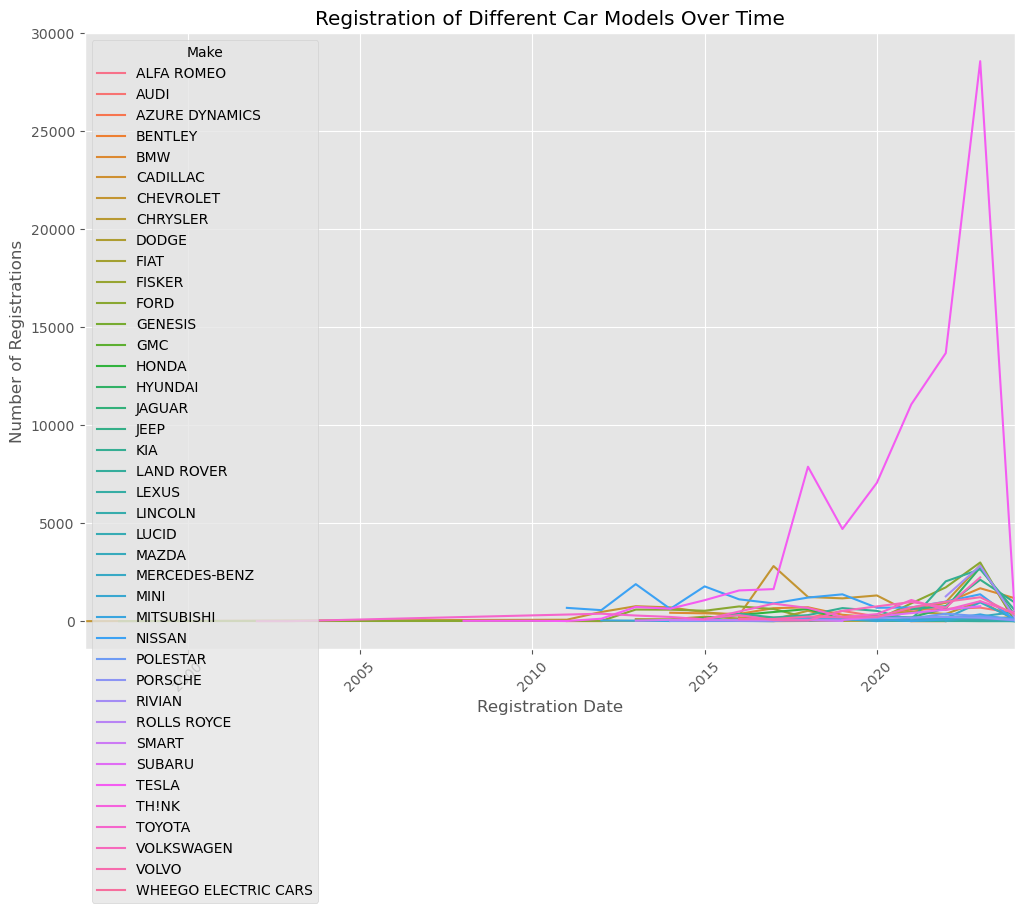

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model Year', y='counts', hue='Make', data=model_registration_counts)
plt.title('Registration of Different Car Models Over Time')
plt.xlabel('Registration Date')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.xlim(1997, 2024)
plt.show()

In [20]:
top_10_models = df['Make'].value_counts().head(10)
top_10_models = top_10_models.index.tolist()
top_10_models

['TESLA',
 'NISSAN',
 'CHEVROLET',
 'FORD',
 'BMW',
 'KIA',
 'TOYOTA',
 'VOLKSWAGEN',
 'JEEP',
 'HYUNDAI']

In [21]:
top_10_df = df[df['Make'].isin(top_10_models)]

In [22]:
top10_model_reg = top_10_df.groupby(['Make', 'Model Year']).size().reset_index(name='counts')

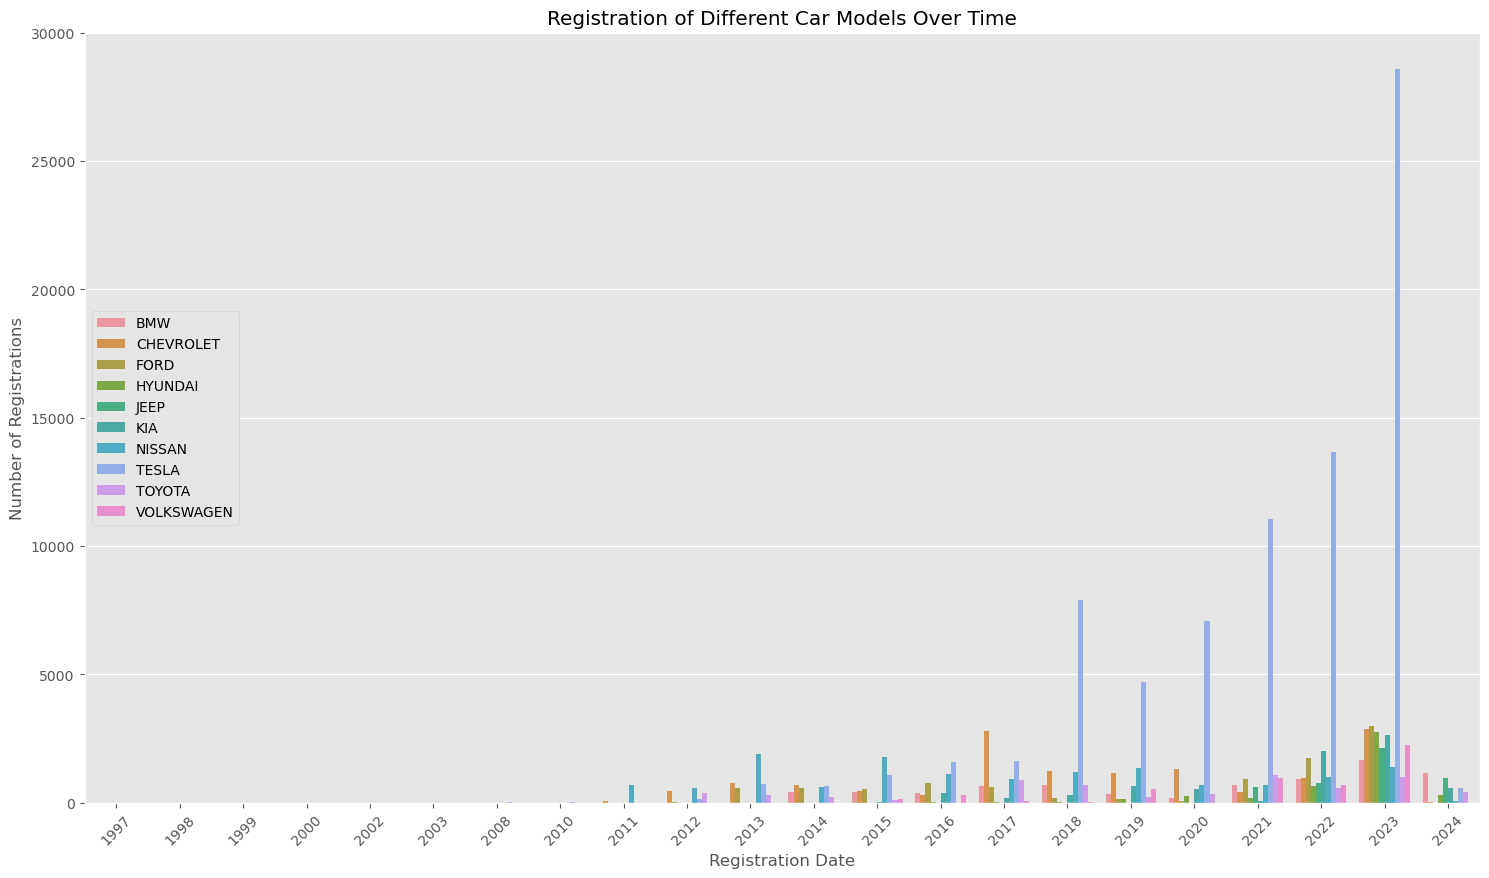

In [23]:
plt.figure(figsize=(18, 10))
sns.barplot(x='Model Year', y='counts', hue='Make', data=top10_model_reg)
plt.legend(loc='center left')
plt.title('Registration of Different Car Models Over Time')
plt.xlabel('Registration Date')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.show()

In [24]:
cities = df['City'].value_counts()

In [25]:
cities.shape

(461,)

In [26]:
city10 = cities.head(10).reset_index(name='count')
city10

,City,count
0,Seattle,29447
1,Bellevue,8930
2,Redmond,6478
3,Vancouver,6193
4,Bothell,5863
5,Kirkland,5362
6,Sammamish,5280
7,Renton,4980
8,Olympia,4299
9,Tacoma,3722


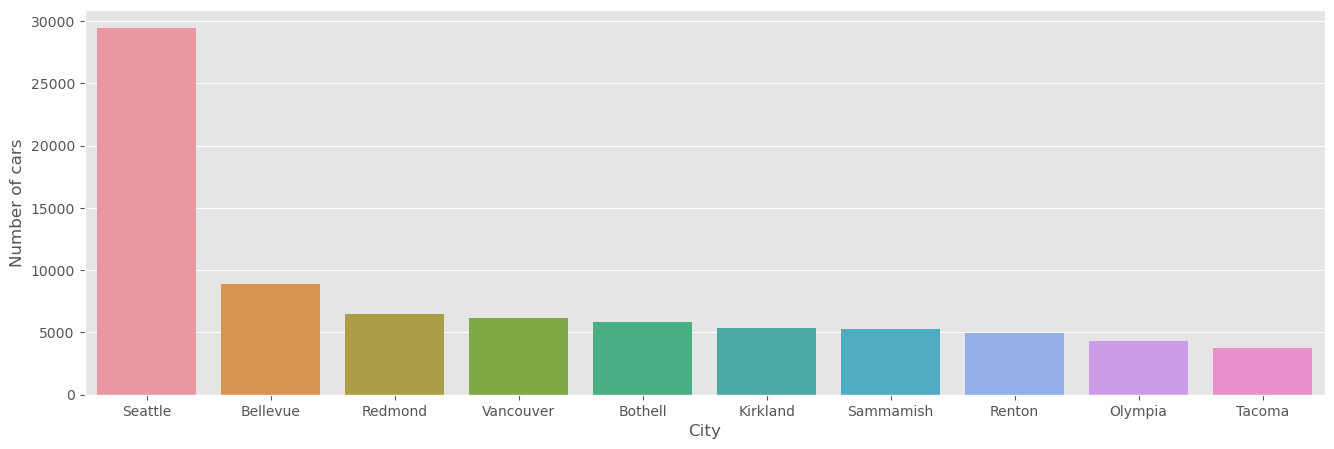

In [27]:
plt.figure(figsize=(16,5))
sns.barplot(x='City',y='count', data=city10)
plt.ylabel('Number of cars')
plt.show()

In [28]:
county = df['County'].value_counts()
county.shape

(39,)

In [29]:
county.head(5)

County
King         92740
Snohomish    21001
Pierce       13656
Clark        10409
Thurston      6428
Name: count, dtype: int64

In [30]:
alt = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

In [31]:
alt

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    91600
Clean Alternative Fuel Vehicle Eligible                         66023
Not eligible due to low battery range                           19455
Name: count, dtype: int64

In [32]:
top_10_alt = top_10_df.groupby(['Make', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']).size().reset_index(name='counts')

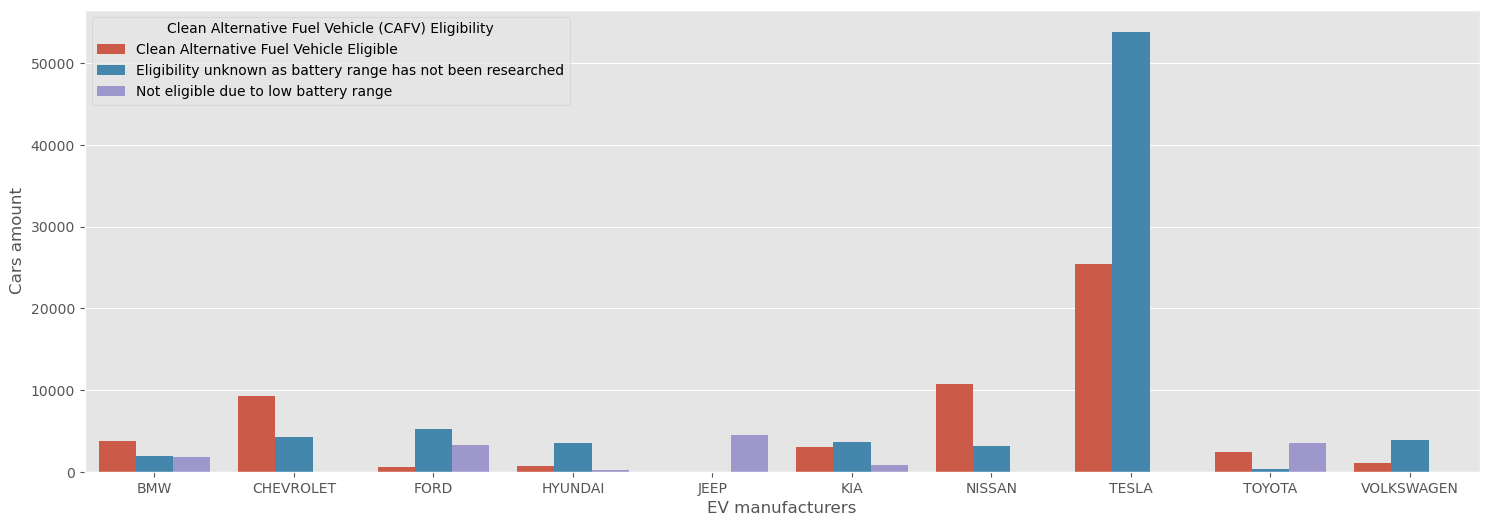

In [33]:
plt.figure(figsize=(18,6))
sns.barplot(x='Make', y='counts', hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=top_10_alt)
plt.xlabel('EV manufacturers')
plt.ylabel('Cars amount')
plt.show()

In [34]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


In [35]:
range = df['Electric Range'].value_counts()

In [36]:
range.head(5)

Electric Range
0      91600
215     6346
220     4094
25      4077
32      3892
Name: count, dtype: int64

In [37]:
range.head(5)

Electric Range
0      91600
215     6346
220     4094
25      4077
32      3892
Name: count, dtype: int64

In [38]:
df_range = df
df_range.drop(df_range[df_range['Electric Range'] == 0].index, inplace=True)

In [39]:
range_improvement = df_range.groupby('Model Year')['Electric Range'].mean().reset_index(name='Miles')

In [40]:
range_improvement

,Model Year,Miles
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.932642
9,2012,61.231677


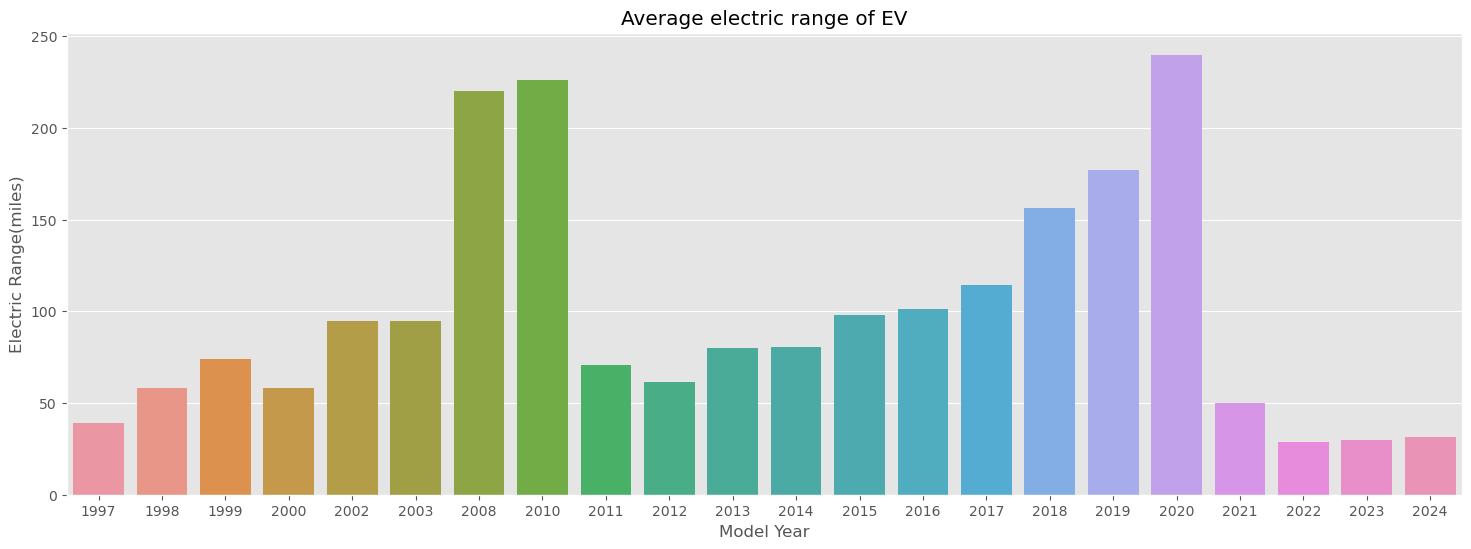

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(x='Model Year', y='Miles', data=range_improvement)
plt.title('Average electric range of EV')
plt.ylabel('Electric Range(miles)')
plt.show()

In [42]:
df_2021 = df[df['Model Year'] == 2021]

In [43]:
range_2021 = df_2021['Electric Range'].value_counts()
range_2021.head(5)

Electric Range
42    808
18    700
25    663
32    474
30    318
Name: count, dtype: int64

In [44]:
df_2021.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
13,WA1E2AFY4M,Snohomish,Lynnwood,WA,98036,2021,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0.0,1.0,168371122.0,POINT (-122.316675 47.819365),PUGET SOUND ENERGY INC,5.306105e+10
27,WA1AAAGE4M,King,Seattle,WA,98108,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0.0,37.0,156817314.0,POINT (-122.3268963 47.5499519),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
59,1C4JJXP61M,Thurston,Tenino,WA,98589,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0.0,35.0,182674320.0,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
69,5UXTS1C01M,Thurston,Olympia,WA,98501,2021,BMW,X3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,17,0.0,22.0,223772797.0,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
134,5UXTA6C09M,Snohomish,Lynnwood,WA,98087,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0.0,21.0,255396487.0,POINT (-122.2551991 47.8650827),PUGET SOUND ENERGY INC,5.306104e+10


In [45]:
df_2021['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Plug-in Hybrid Electric Vehicle (PHEV)    3776
Battery Electric Vehicle (BEV)             561
Name: count, dtype: int64

In [46]:
types_year = df.groupby(['Model Year', 'Electric Vehicle Type']).size().reset_index(name='counts')

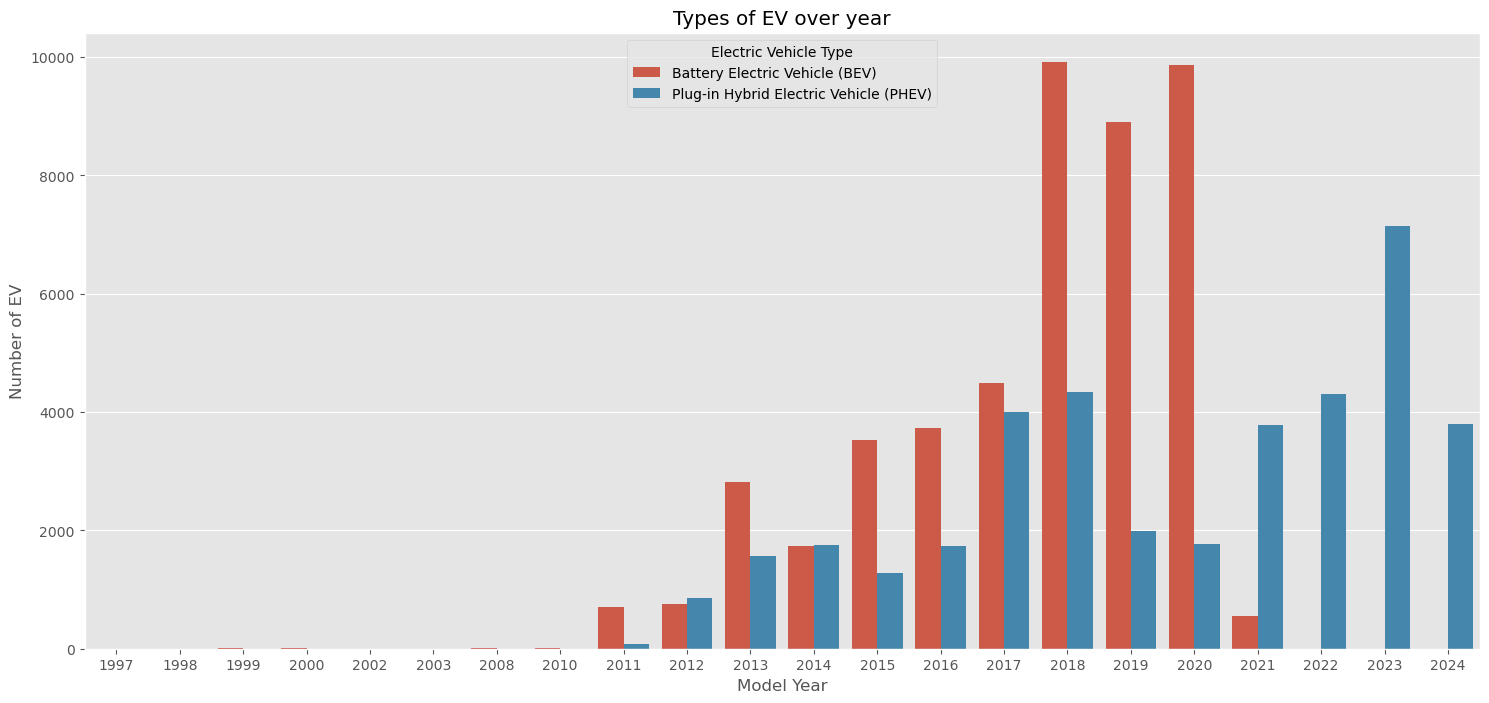

In [47]:
plt.figure(figsize=(18,8))
sns.barplot(x='Model Year', y='counts', hue='Electric Vehicle Type', data=types_year)
plt.title('Types of EV over year')
plt.ylabel('Number of EV')
plt.show()

### Decrease in Range of EV from 2021 is because of a dramatical increase of PHEV and a plunge of BEV

## Estimated Market Size Analysis of EV

In [50]:
registration

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      772
2012     1610
2013     4392
2014     3488
2015     4816
2016     5460
2017     8505
2018    14252
2019    10888
2020    11709
2021    19025
2022    27635
2023    57407
2024     7060
Name: count, dtype: int64

#### 2024 data only is not complited(only data until march), so it should not be used for prediction

In [52]:
filtered = registration[registration.index <= 2023]

In [69]:
filtered = registration[registration.index <= 2023]

def exp_growth(x, a, b):
    return a * np.exp(b * x)


x_data = filtered.index - filtered.index.min()
y_data = filtered.values

params, covariance = curve_fit(exp_growth, x_data, y_data)

forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

forecasted_evs = dict(zip(forecast_years + filtered.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 78943.00237310983, 2025: 119475.96376429353, 2026: 180820.4082477239, 2027: 273661.9066189533, 2028: 414172.4922538633, 2029: 626827.6628600223}


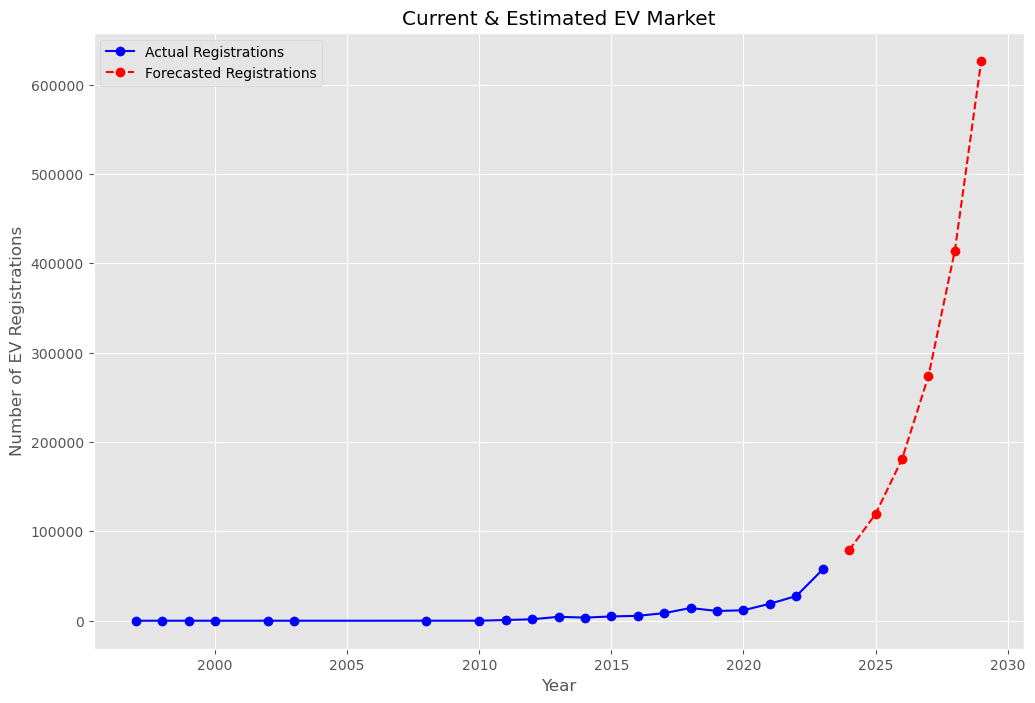

In [101]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]
plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()